In [2]:
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [3]:
data_path = './data/SULGIPE_46_2018-12-31_M10_20190611-1750.gdb'
# Carguemos la tabla de consumidores de baja tension denominada UCBT
ucbt = gpd.read_file(data_path, driver='FileGDB', layer='UCBT')

In [4]:
col_sel = ['PAC', 'CONJ', 'MUN', 'BRR', 'CLAS_SUB', 'CNAE', 
 'FAS_CON', 'GRU_TEN', 'TEN_FORN', 'GRU_TAR', 'DAT_CON', 'CAR_INST',
 'ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07',
 'ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12', 'ARE_LOC', 'SIT_ATIV','DIC',
 'FIC']
data = ucbt[col_sel]

In [5]:
# Convertimos los identificadores de los conjuntos a strings
data['CONJ'] = data.CONJ.astype(str)
data['DAT_CON'] = pd.to_datetime(data.DAT_CON, dayfirst=True, format='%d/%m/%Y')

In [6]:
# Clasificar columnas en categoricas y numericas
cat_ft = data.columns[data.dtypes == 'object']
num_ft = data.columns[data.dtypes != 'object']

## 1.1 Cuantas entradas posee el dataset y que representa cada una?

In [7]:
len(ucbt.columns[ucbt.dtypes == 'object'])

20

## 1.2 Si queremos analizar calidad de servicio cual seria a su parece la variable de salida?

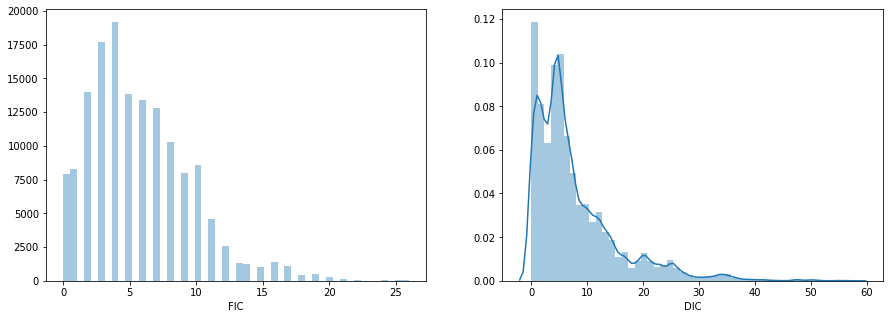

In [7]:
# Distribucion de la Frecuencia de interrupciones
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data.FIC, kde=False)
# Distribucion de la Duración de interrupciones
plt.subplot(1,2,2)
sns.distplot(data.DIC)

<Figure size 720x432 with 0 Axes>

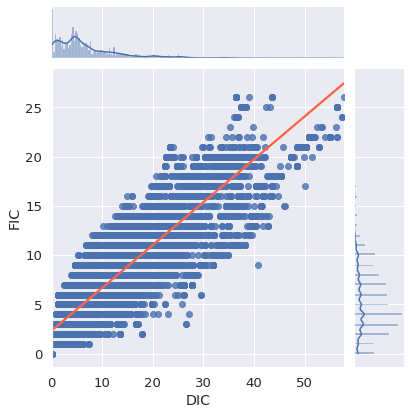

In [11]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 1.2)
sns.jointplot(data['DIC'], data['FIC'], kind='reg', line_kws={'color':'tomato'});

In [9]:
from scipy import stats

stats.spearmanr(data.FIC,data.DIC)

SpearmanrResult(correlation=0.8482140591587785, pvalue=0.0)

El test de Spearman tiene como hipótesis nula que las variables no están correlacionadas. Como el pvalue=0 significa que sí existe correlación. EL valor del coeficiente de correlación es ~0.85, lo que indica una correlación muy alta.

In [10]:
import numpy as np

dic_m = np.mean(data.DIC)
fic_m = np.mean(data.FIC)

print('Media de DIC: ',dic_m)
print('Media de FIC: ',fic_m)

Media de DIC:  7.7273491441589774
Media de FIC:  5.706682078749471


Como las mediciones de FIC y de DIC están hechas para un período de un año, a mayor frecuencia de corte más horas de corte se acumulan. Es por esto que observamos el valor de correlación tan alto. De esta manera, una buena variable para calificar la calidad del servicio es FIC.

# 2. Analisis Estadistico

## Variables numéricas y sus estadísticos principales

In [11]:
ucbt.describe().T

,count,mean,std,min,25%,50%,75%,max
DIST,148801.0,46.000000,0.000000,46.00,46.00,46.00,46.00,46.00
CONJ,148801.0,14192.166598,1431.394943,12730.00,12737.00,15600.00,15602.00,15602.00
CAR_INST,148801.0,33.747667,626.773221,0.01,0.61,7.61,30.00,81936.00
LIV,148801.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
ENE_01,148801.0,121.128332,2403.634067,-436.00,38.00,68.00,103.00,695852.00
ENE_02,148801.0,124.699075,2196.068210,-1228.00,40.00,71.00,107.00,628569.00
ENE_03,148801.0,119.039805,2410.040568,-581.00,38.00,66.00,100.00,699107.00
ENE_04,148801.0,119.387208,2333.439678,-428.00,38.00,68.00,101.00,677483.00
ENE_05,148801.0,116.147996,2429.333738,-674.00,37.00,65.00,97.00,701631.00
ENE_06,148801.0,109.975148,2348.053272,-1478.00,35.00,62.00,94.00,680697.00


## 2.3 Existen valores que no sean validos? Cuales? Que se puede hacer en esos casos?

Existen valores negativos para los consumos por períodos ENE_XX. Dichos valores negativos no tienen sentido ya que no existe consumo negativo de energía en este contexto. Si bien, podrían surgir al compensar por una sobrefacturación anterior no sabemos cuál es el mes que originó el registro. Inclusive, no sabemos si el supuesto es correcto. Por lo tanto tomamos el supuesto de trabajo de poner un mínimo en las variables ENE_XX de cero.  

## 2.4 Poseen outliers? Que tecnicas se pueden utilizar para mitigar su impacto.

De un análisis de los estadísticos observamos que en los consumos todos los valores máximos se encuentran a una distancia de más de 3 desviaciones estandar de la media de cada período. Es posible realizar un análisis más profundo por período de manera tal de eliminar aquellos valores que se alejen más de 3 desviaciones estandar de la media de manera tal de tener una muestra más homogenea.

## Como es la distribucion de los valores? Son normales?

In [12]:
def mask(column):
    std = np.std(data[column])
    r = (data[column] < 3*std) & (data[column] >= 0)
    return r

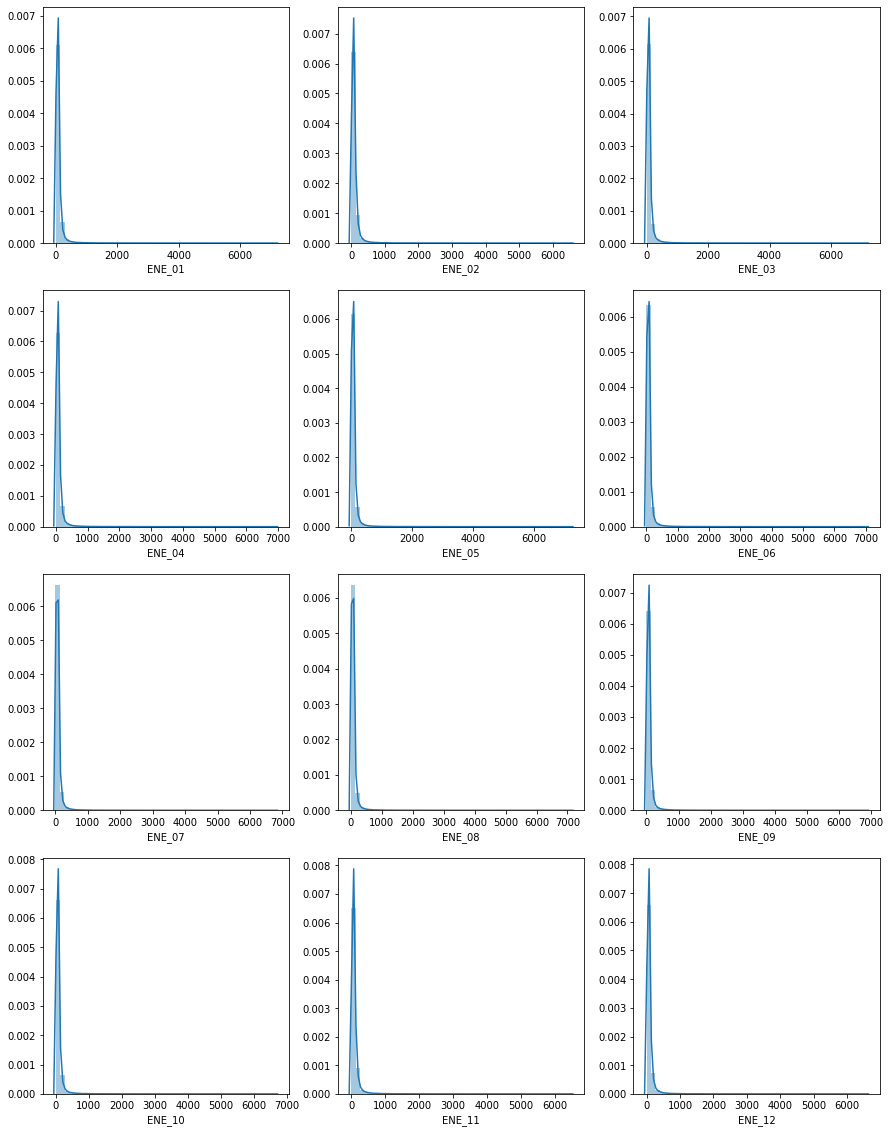

In [13]:
plt.figure(figsize=(15,20))
for n in range(12):
    plt.subplot(4,3,n+1)
    if n < 9:
        r = 'ENE_0'+str(n+1)
    else:
        r = 'ENE_'+str(n+1)
    sns.distplot(data[r][mask(r)])

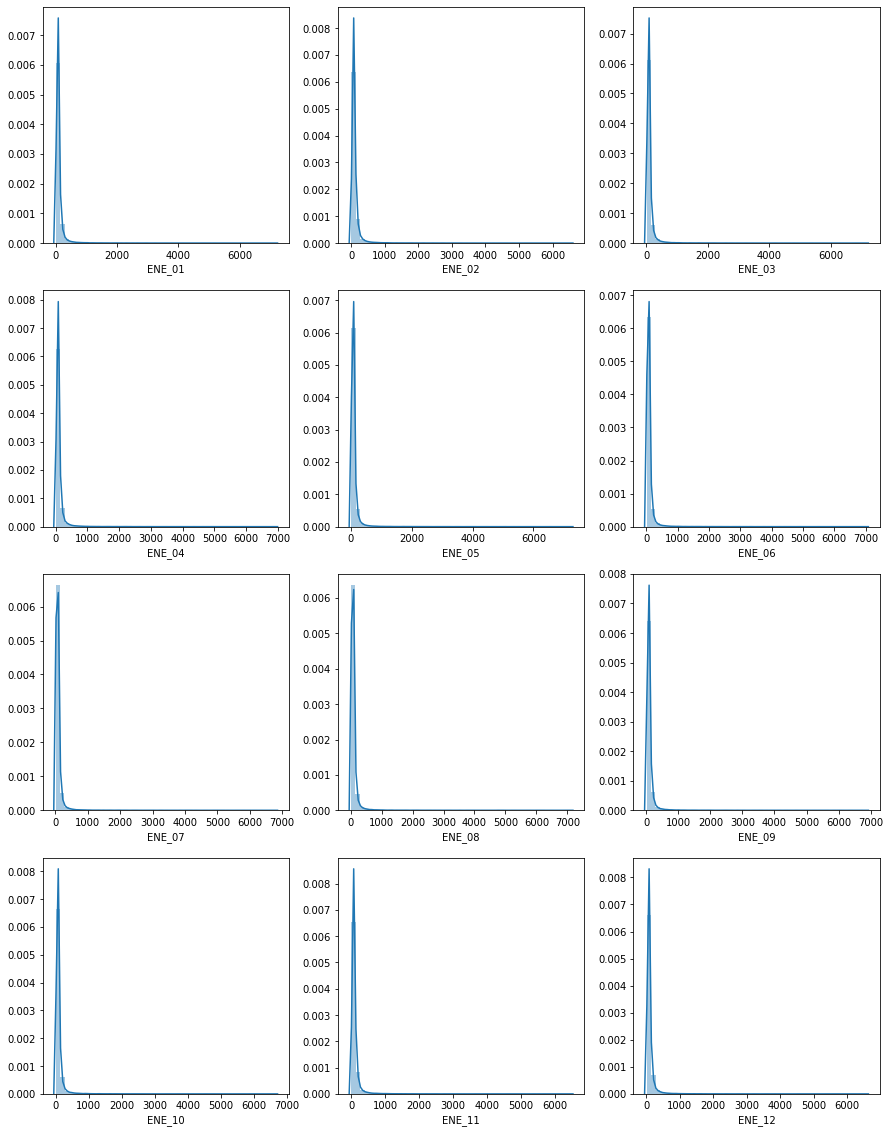

In [14]:
def mask2(column):
    std = np.std(data[column])
    r = (data[column] < 3*std) & (data[column] >= 10)
    return r

plt.figure(figsize=(15,20))
for n in range(12):
    plt.subplot(4,3,n+1)
    if n < 9:
        r = 'ENE_0'+str(n+1)
    else:
        r = 'ENE_'+str(n+1)
    sns.distplot(data[r][mask2(r)])

Las variabes ENE_XX presentan todas una inucitada concentración de valores alrededor de cero. Esto significa que son clientes sin consumo. Si tomamos los clientes que consumen energía y además eliminamos los outliers las distribuciones resultantes son muy similares a las de Poisson. Sin embargo, para entender mejor como se distribuyen los consumos es necesario dividir los clientes por clases dependiendo del estudio que se vaya a realizar.

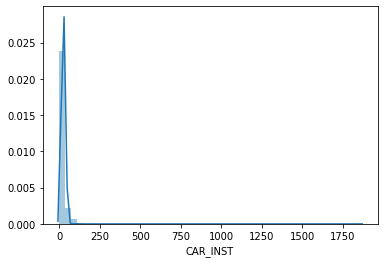

In [15]:
sns.distplot(data['CAR_INST'][mask('CAR_INST')])

La variable CAR_INST es la potencia máxima que permite el disyuntor instalado en la unidad consumidora. La variable presenta una distribución discreta de los valores. Nuestra suposición es que los clientes residenciales presentan los valores más bajos de la variable, asociado a instalaciones pequeñas, mientras que oficinas, grandes centros comerciales e industrias se distribuyen en los valores más altos.

## 2.5 Calcule los principales estadisticos despues del preprocesamiento.

In [16]:
ENE = ['ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07',
 'ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12']

data_pos = data

for nene in ENE:
    num = data_pos[ENE]._get_numeric_data()
    num[num < 0] = 0
    data_pos[ENE] = num

In [17]:
media_list = []
for n in range(12):
    if n < 9:
        r = 'ENE_0'+str(n+1)
    else:
        r = 'ENE_'+str(n+1)
    media = np.mean(data[r][mask(r)])
    desviacion = np.std(data[r][mask(r)])
    media_list.append(media)
    print('Media '+r+':',media)
    print('Desv. estandar '+r+':',desviacion)

Media ENE_01: 98.7211374241874
Desv. estandar ENE_01: 228.00963666463534
Media ENE_02: 101.85061869535978
Desv. estandar ENE_02: 224.21695041338214
Media ENE_03: 96.7830170918333
Desv. estandar ENE_03: 227.18244093320348
Media ENE_04: 97.66361392962567
Desv. estandar ENE_04: 224.8927502347373
Media ENE_05: 93.3102251867591
Desv. estandar ENE_05: 219.73642387943042
Media ENE_06: 88.70630198142956
Desv. estandar ENE_06: 206.69615397924468
Media ENE_07: 82.01649297384522
Desv. estandar ENE_07: 191.61288187555954
Media ENE_08: 85.20727886399699
Desv. estandar ENE_08: 204.94387820728002
Media ENE_09: 92.52223701551951
Desv. estandar ENE_09: 210.60641351930454
Media ENE_10: 90.72116619487235
Desv. estandar ENE_10: 215.44139703355768
Media ENE_11: 100.4695340501792
Desv. estandar ENE_11: 225.1775509310256
Media ENE_12: 94.70861350188274
Desv. estandar ENE_12: 217.75915693436673


In [18]:
data_pos.describe().T

,count,mean,std,min,25%,50%,75%,max
CAR_INST,148801.0,33.747667,626.773221,0.01,0.61,7.61,30.00,81936.00
ENE_01,148801.0,121.147721,2403.632243,0.00,38.00,68.00,103.00,695852.00
ENE_02,148801.0,124.747448,2196.058493,0.00,40.00,71.00,107.00,628569.00
ENE_03,148801.0,119.066021,2410.037850,0.00,38.00,66.00,100.00,699107.00
ENE_04,148801.0,119.412262,2333.437310,0.00,38.00,68.00,101.00,677483.00
ENE_05,148801.0,116.163614,2429.331849,0.00,37.00,65.00,97.00,701631.00
ENE_06,148801.0,109.999234,2348.048378,0.00,35.00,62.00,94.00,680697.00
ENE_07,148801.0,103.038911,2287.196467,0.00,33.00,58.00,87.00,633347.00
ENE_08,148801.0,108.475891,2384.773011,0.00,34.00,60.00,89.00,633347.00
ENE_09,148801.0,113.755983,2192.920715,0.00,38.00,65.00,97.00,613034.00


## Cuales son las variables categoricas? Cual es la cardinalidad de las mismas?

In [19]:
data.describe(include='O').T

,count,unique,top,freq
PAC,148801,145433,UC51068,26
CONJ,148801,6,15602,42090
MUN,148801,14,2802106,30785
BRR,148801,706,CENTRO,20614
CLAS_SUB,148801,28,RE1,99475
CNAE,148801,142,0,148046
FAS_CON,148801,9,AN,96082
GRU_TEN,148801,1,BT,148801
TEN_FORN,148801,1,22,148801
GRU_TAR,148801,6,B1,130596


## En base a la respuesta anterior vale la manera mantenerlas a todas? En base a la respuesta anterior vale la manera mantenerlas a todas?

Las variables interesantes son aquellas de cardinalidad baja ya que nos permiten analizar la muestra en función de un número acotado de aspectos. Por lo tanto, no vale la pena mantener todas estas variables.

## Cuales son los 3 valores mas comunes de cada categoria?

## Escoja 2 variables y grafique sus niveles contra la cantidad de apariciones.

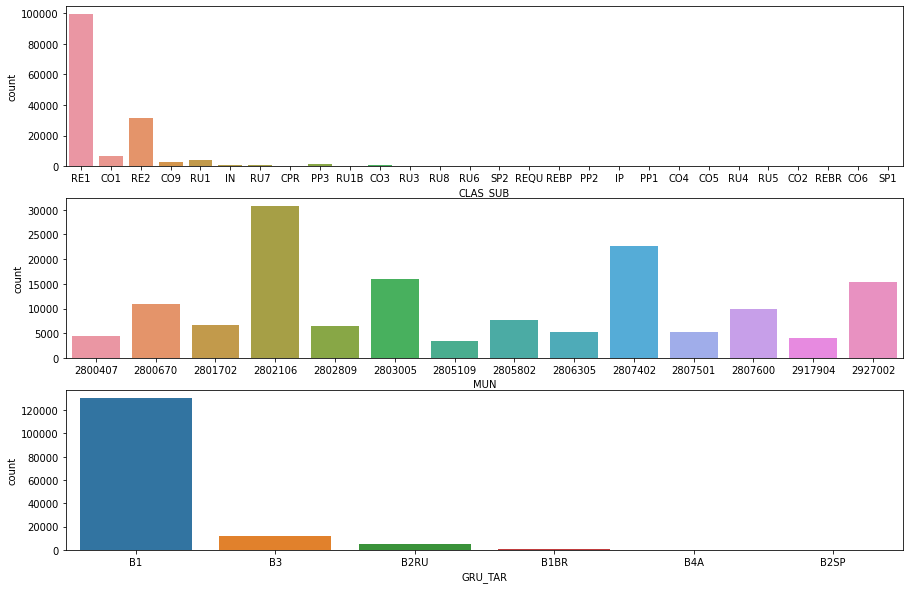

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(311)
sns.countplot(data.CLAS_SUB)
plt.subplot(312)
sns.countplot(data.MUN)
plt.subplot(313)
sns.countplot(data.GRU_TAR)

## Correlación entre las variables y la variable de salida FIC

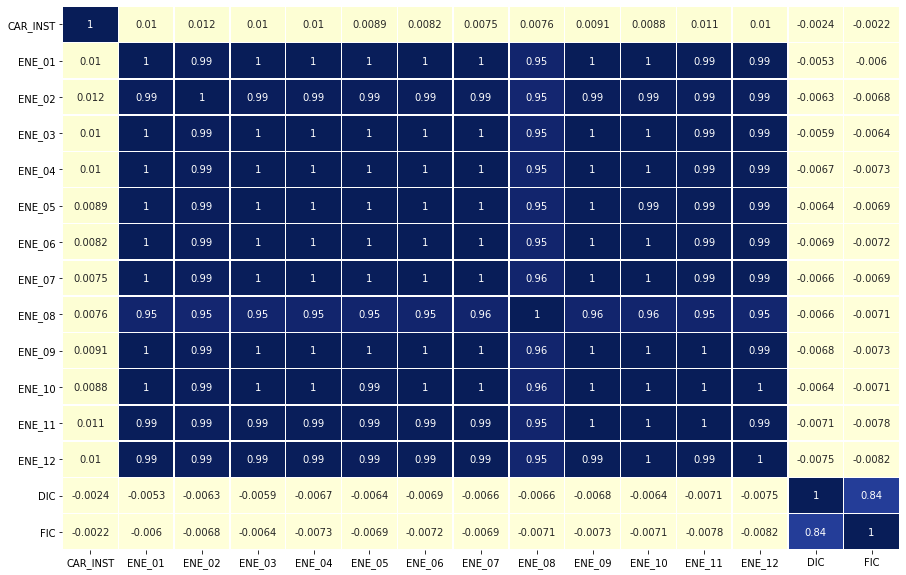

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(data_pos[num_ft].corr(),annot=True, linewidths=.5,cmap="YlGnBu", cbar=False)

Se observa que la variable de salida FIC no está correlacionada con ninguna otra variable más que DIC. Por otro lado, los consumos mensuales sí están correlacionados entre ellos, indicando que los consumos por cliente se mantienen estables período a período.

## Escoja una variable categorica y calcule las distribuciones condicionales para cada nivel de la misma.

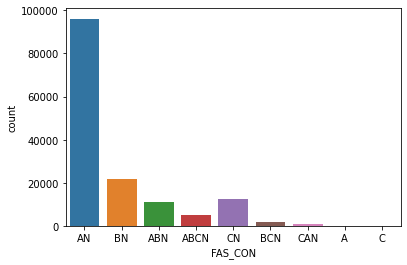

In [22]:
sns.countplot(data['FAS_CON'])

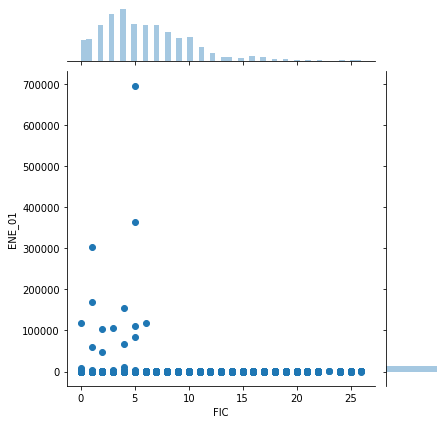

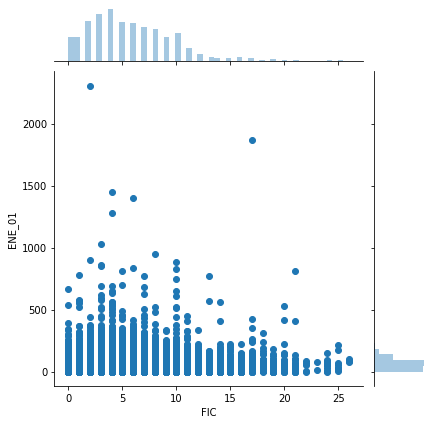

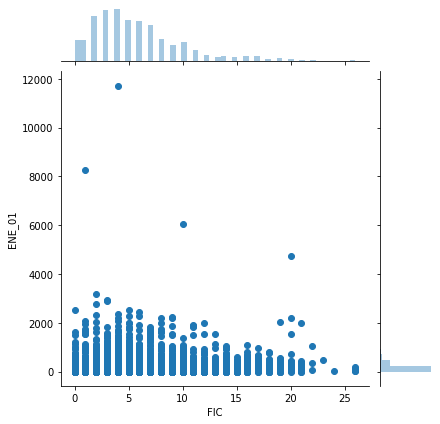

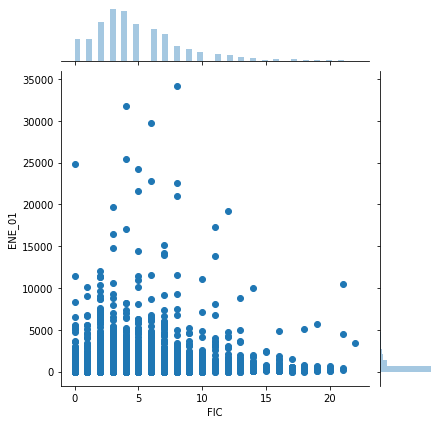

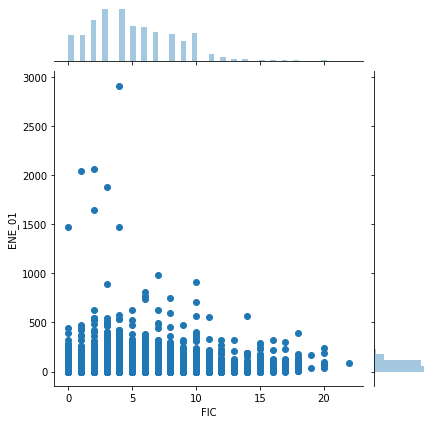

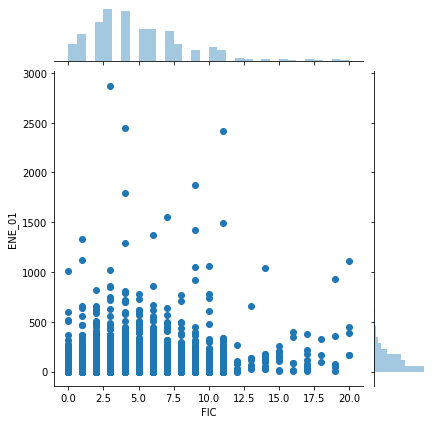

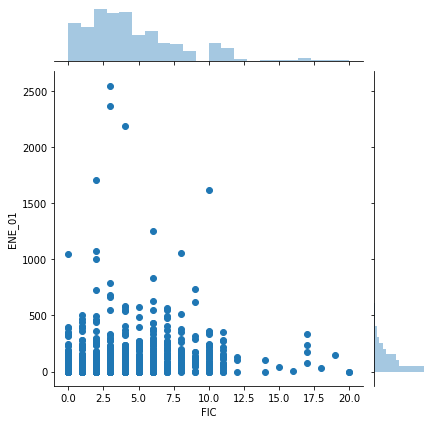

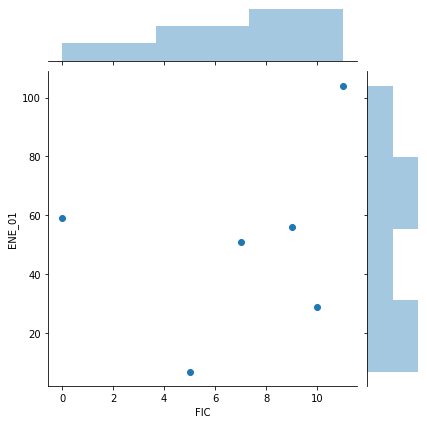

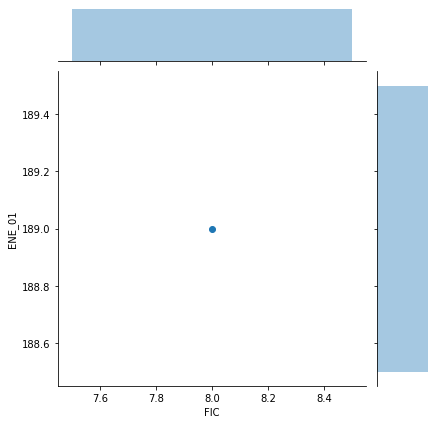

In [23]:
uniq = list(data['FAS_CON'].unique())

for u in uniq:
    data_u = data[data['FAS_CON'] == u]
    sns.jointplot(data_u['FIC'], data_u['ENE_01'])

## 3.1 Calcule el consumo total anual de cada consumidor.

In [24]:
consumo_total = data_pos[ENE]
consumo_total = consumo_total.sum(axis = 1, skipna = True) 

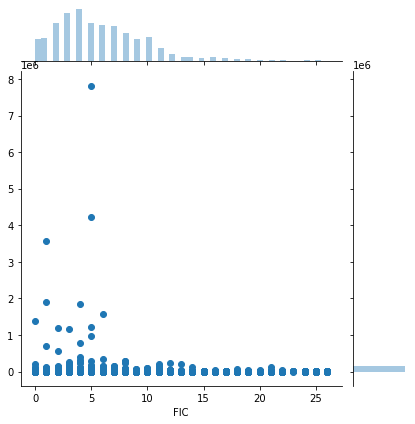

In [25]:
sns.jointplot(data.FIC,consumo_total)

## Servicio en zonas urbanas

In [26]:
data['CLAS_SUB'].unique()

array(['RE1', 'CO1', 'RE2', 'CO9', 'RU1', 'IN', 'RU7', 'CPR', 'PP3',
       'RU1B', 'CO3', 'RU3', 'RU8', 'RU6', 'SP2', 'REQU', 'REBP', 'PP2',
       'IP', 'PP1', 'CO4', 'CO5', 'RU4', 'RU5', 'CO2', 'REBR', 'CO6',
       'SP1'], dtype=object)

RE: residencial, RU: rural, CO: comercial, IN: industrial, IP: iluminación pública, SP: servicio público, PP:poder público, CPR: consumo propio

In [27]:
data['CLAS_SUB'].value_counts()

RE1     99475
RE2     31682
CO1      6860
RU1      3823
CO9      2792
PP3      1233
RU7       728
IN        524
CO3       470
RU1B      311
REQU      230
SP2       155
PP2       108
RU3       100
REBP       70
CO5        59
IP         43
PP1        36
RU8        34
CO4        25
CPR        24
CO2         8
RU4         4
RU5         2
CO6         2
SP1         1
RU6         1
REBR        1
Name: CLAS_SUB, dtype: int64

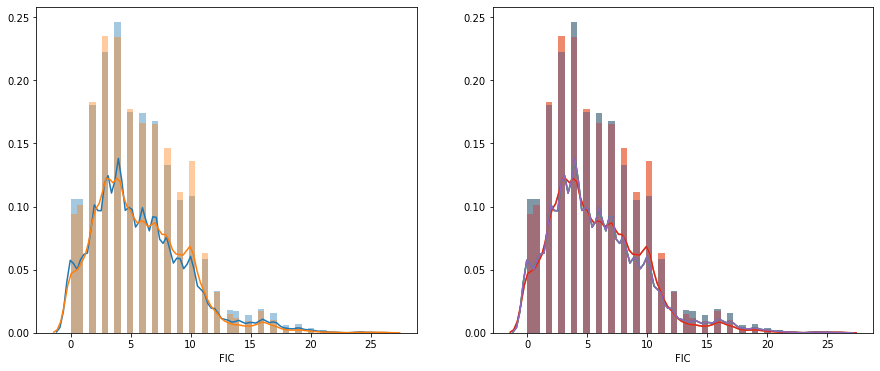

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
RE1 = data_pos[data_pos['CLAS_SUB'] == 'RE1']
sns.distplot(RE1.FIC)
RE2 = data_pos[data_pos['CLAS_SUB'] == 'RE2']
sns.distplot(RE2.FIC)
plt.subplot(1,2,2)
RU1 = data_pos[data_pos['CLAS_SUB'] == 'RU1']
sns.distplot(RE1.FIC)
RU2 = data_pos[data_pos['CLAS_SUB'] == 'RU2']
sns.distplot(RE2.FIC)
RU3 = data_pos[data_pos['CLAS_SUB'] == 'RU3']
sns.distplot(RE1.FIC)
RU4 = data_pos[data_pos['CLAS_SUB'] == 'RU4']
sns.distplot(RE2.FIC)
RU5 = data_pos[data_pos['CLAS_SUB'] == 'RU5']
sns.distplot(RE1.FIC)


In [29]:
RE = ['RE1','RE2']
RU = ['RU1','RU2','RU3','RU4','RU5']

for r in RE:
    f = data_pos[data_pos['CLAS_SUB'] == r]
    media = np.mean(f.FIC)
    std = np.std(f.FIC)
    print('Media de '+r+':',media)
    print('Std de '+r+':',std)
for r in RU:
    f = data_pos[data_pos['CLAS_SUB'] == r]
    media = np.mean(f.FIC)
    std = np.std(f.FIC)
    print('Media de '+r+':',media)
    print('Std de '+r+':',std)

Media de RE1: 5.746820809248555
Std de RE1: 3.9284307047176656
Media de RE2: 5.721640047976769
Std de RE2: 3.733880590362595
Media de RU1: 6.865289040020926
Std de RU1: 4.472007973095938
Media de RU2: nan
Std de RU2: nan
Media de RU3: 7.29
Std de RU3: 3.940291867362112
Media de RU4: 1.75
Std de RU4: 1.0897247358851685
Media de RU5: 4.5
Std de RU5: 2.5


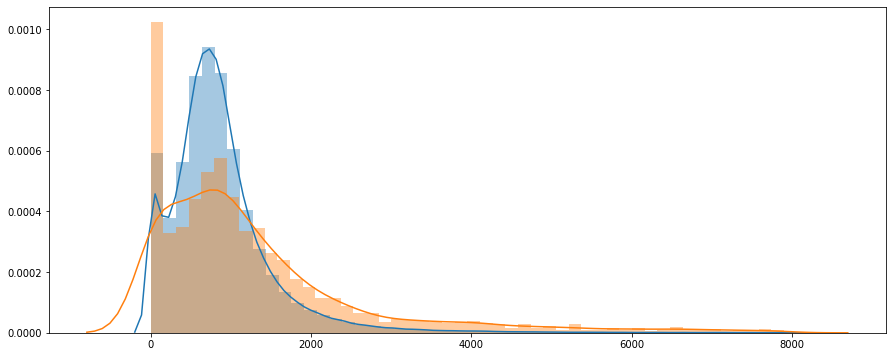

In [30]:
plt.figure(figsize=(15,6))
consumo_total = data_pos[data_pos.CLAS_SUB.isin(RE)]
consumo_total = consumo_total[ENE]
consumo_total = consumo_total.sum(axis = 1, skipna = True)
sns.distplot(consumo_total[consumo_total <6000])
consumo_total = data_pos[data_pos.CLAS_SUB.isin(RU)]
consumo_total = consumo_total[ENE]
consumo_total = consumo_total.sum(axis = 1, skipna = True)
sns.distplot(consumo_total[consumo_total <6000])